<a href="https://colab.research.google.com/github/rinazbelhaj/EVA/blob/master/Project%206/Assignment%206A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


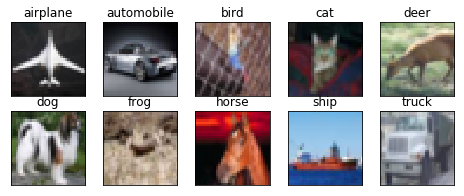

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 15s 39ms/step - loss: 1.8468 - acc: 0.2948 - val_loss: 1.4807 - val_acc: 0.4482
Epoch 2/50
390/390 [==============================] - 9s 23ms/step - loss: 1.3568 - acc: 0.5084 - val_loss: 1.1420 - val_acc: 0.5876
Epoch 3/50
390/390 [==============================] - 9s 23ms/step - loss: 1.1362 - acc: 0.6007 - val_loss: 1.0234 - val_acc: 0.6323
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 0.9949 - acc: 0.6516 - val_loss: 0.9279 - val_acc: 0.6739
Epoch 5/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8929 - acc: 0.6902 - val_loss: 0.7903 - val_acc: 0.7284
Epoch 6/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8121 - acc: 0.7189 - val_loss: 0.7381 - val_acc: 0.7458
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7585 - acc: 0.7386 - val_loss: 0.7109 - val_acc: 0.7593
Epoch 8/50
390/390 [==============================] - 9s 23ms/step -

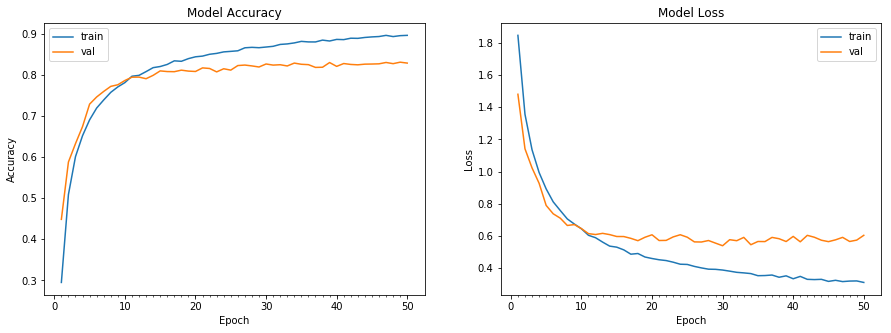

Accuracy on test data is: 82.82


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D

# Define the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',padding='valid',input_shape=(32,32,3), name='conv_1')) # RF - 3
model.add(Conv2D(64, (3, 3), activation='relu',padding='valid', name='conv_2')) # RF - 5
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_1')) # RF - 6
model.add(Dropout(0.10,name='dropout_1')) # RF - 6

model.add(Conv2D(32,  (1, 1), activation='relu',padding='valid', name='conv_3')) # RF - 6
model.add(Conv2D(64,  (3, 3), activation='relu',padding='valid', name='conv_4')) # RF - 10
model.add(Conv2D(128, (3, 3), activation='relu',padding='valid', name='conv_5')) # RF - 14
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_2')) # RF - 16
model.add(Dropout(0.10,name='dropout_2')) # RF - 16

model.add(Conv2D(32,  (1, 1), activation='relu',padding='valid', name='conv_6')) # RF - 16
model.add(Conv2D(64,  (3, 3), activation='relu',padding='valid', name='conv_7')) # RF - 24
model.add(Conv2D(128, (3, 3), activation='relu',padding='valid', name='conv_8')) # RF - 32
model.add(Dropout(0.10,name='dropout_3')) # RF - 32

model.add(Conv2D(10,  (1, 1), activation=None,padding='valid', name='conv_9')) # RF - 32
model.add(Flatten(name='flatten'))
model.add(Activation('softmax', name='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 64)        18496     
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 14, 14, 32)        2080      
_________________________________________________________________
conv_4 (Conv2D)              (None, 12, 12, 64)        18496     
_________________________________________________________________
conv_5 (Conv2D)              (None, 10, 10, 128)       73856     
__________

Epoch 1/100
390/390 [==============================] - 8s 21ms/step - loss: 1.7371 - acc: 0.3561 - val_loss: 1.4345 - val_acc: 0.4654
Epoch 2/100
390/390 [==============================] - 7s 18ms/step - loss: 1.3296 - acc: 0.5182 - val_loss: 1.2424 - val_acc: 0.5492
Epoch 3/100
390/390 [==============================] - 7s 18ms/step - loss: 1.1531 - acc: 0.5859 - val_loss: 1.1692 - val_acc: 0.5903
Epoch 4/100
390/390 [==============================] - 7s 18ms/step - loss: 1.0298 - acc: 0.6330 - val_loss: 1.0102 - val_acc: 0.6390
Epoch 5/100
390/390 [==============================] - 7s 18ms/step - loss: 0.9454 - acc: 0.6637 - val_loss: 0.9435 - val_acc: 0.6644
Epoch 6/100
390/390 [==============================] - 7s 18ms/step - loss: 0.8702 - acc: 0.6933 - val_loss: 0.9016 - val_acc: 0.6787
Epoch 7/100
390/390 [==============================] - 7s 18ms/step - loss: 0.8141 - acc: 0.7116 - val_loss: 0.9028 - val_acc: 0.6876
Epoch 8/100
390/390 [==============================] - 7s 18ms

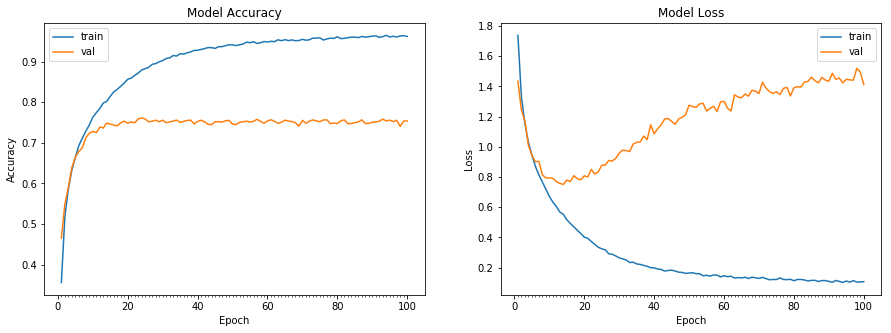

Accuracy on test data is: 75.38


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = train_features.shape[0]//128, epochs = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Epoch 1/100
390/390 [==============================] - 9s 22ms/step - loss: 1.7378 - acc: 0.3537 - val_loss: 1.4406 - val_acc: 0.4757
Epoch 2/100
390/390 [==============================] - 7s 18ms/step - loss: 1.3263 - acc: 0.5197 - val_loss: 1.2410 - val_acc: 0.5469
Epoch 3/100
390/390 [==============================] - 7s 17ms/step - loss: 1.1470 - acc: 0.5887 - val_loss: 1.0788 - val_acc: 0.6110
Epoch 4/100
390/390 [==============================] - 7s 18ms/step - loss: 1.0212 - acc: 0.6387 - val_loss: 0.9998 - val_acc: 0.6520
Epoch 5/100
390/390 [==============================] - 7s 18ms/step - loss: 0.9460 - acc: 0.6648 - val_loss: 0.9349 - val_acc: 0.6710
Epoch 6/100
390/390 [==============================] - 7s 18ms/step - loss: 0.8779 - acc: 0.6894 - val_loss: 0.9236 - val_acc: 0.6765
Epoch 7/100
390/390 [==============================] - 7s 18ms/step - loss: 0.8267 - acc: 0.7070 - val_loss: 0.8865 - val_acc: 0.6886
Epoch 8/100
390/390 [==============================] - 7s 18ms

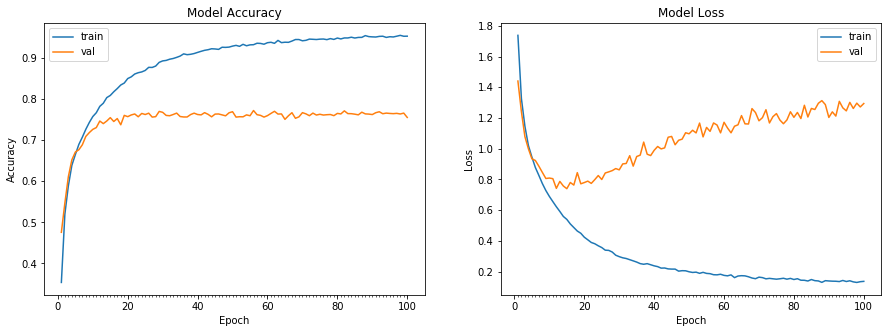

Accuracy on test data is: 75.52


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = train_features.shape[0]//128, epochs = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

# Define the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',padding='same',input_shape=(32,32,3), name='conv_1')) # RF - 3
model.add(Conv2D(64, (3, 3), activation='relu',padding='same', name='conv_2')) # RF - 5
model.add(Conv2D(32, (1, 1), activation='relu',padding='same', name='conv_3')) # RF - 5
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_1')) # RF - 6
model.add(Dropout(0.10,name='dropout_1')) # RF - 6


model.add(Conv2D(64,  (3, 3), activation='relu',padding='same', name='conv_4')) # RF - 10
model.add(Conv2D(64, (3, 3), activation='relu',padding='same', name='conv_5')) # RF - 14
model.add(Conv2D(32,  (1, 1), activation='relu',padding='same', name='conv_6')) # RF - 14
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_2')) # RF - 16
model.add(Dropout(0.10,name='dropout_2')) # RF - 16


model.add(Conv2D(64, (3, 3), activation='relu',padding='same', name='conv_7')) # RF - 24
model.add(Conv2D(128, (3, 3), activation='relu',padding='same', name='conv_8')) # RF - 32
model.add(Dropout(0.15,name='dropout_3')) # RF - 32

model.add(Conv2D(10,  (1, 1), activation=None,padding='same', name='conv_9')) # RF - 32
model.add(GlobalAveragePooling2D(name="GAP"))
model.add(Activation('softmax', name='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv_2 (Conv2D)              (None, 32, 32, 64)        18496     
_________________________________________________________________
conv_3 (Conv2D)              (None, 32, 32, 32)        2080      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 16, 16, 64)        18496     
_________________________________________________________________
conv_5 (Conv2D)              (None, 16, 16, 64)        36928     
__________

Epoch 1/100
390/390 [==============================] - 11s 28ms/step - loss: 1.8010 - acc: 0.3184 - val_loss: 1.5107 - val_acc: 0.4429
Epoch 2/100
390/390 [==============================] - 8s 21ms/step - loss: 1.4169 - acc: 0.4764 - val_loss: 1.2749 - val_acc: 0.5332
Epoch 3/100
390/390 [==============================] - 8s 21ms/step - loss: 1.2089 - acc: 0.5602 - val_loss: 1.1478 - val_acc: 0.5886
Epoch 4/100
390/390 [==============================] - 8s 21ms/step - loss: 1.0833 - acc: 0.6093 - val_loss: 0.9979 - val_acc: 0.6353
Epoch 5/100
390/390 [==============================] - 8s 21ms/step - loss: 1.0102 - acc: 0.6377 - val_loss: 1.0051 - val_acc: 0.6418
Epoch 6/100
390/390 [==============================] - 8s 21ms/step - loss: 0.9425 - acc: 0.6637 - val_loss: 0.9180 - val_acc: 0.6757
Epoch 7/100
390/390 [==============================] - 8s 21ms/step - loss: 0.8918 - acc: 0.6829 - val_loss: 0.8953 - val_acc: 0.6819
Epoch 8/100
390/390 [==============================] - 8s 21m

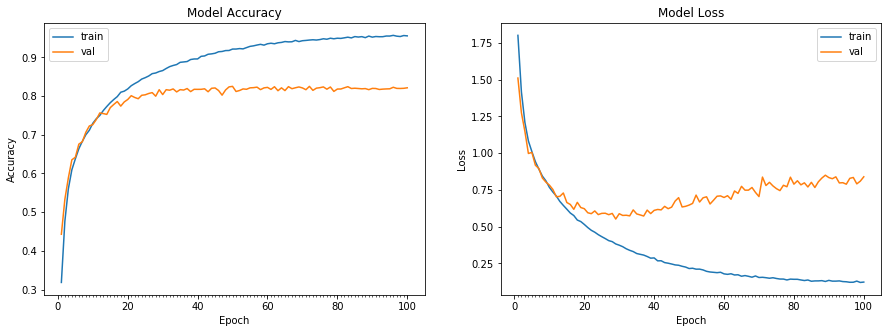

Accuracy on test data is: 82.13


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = train_features.shape[0]//128, epochs = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))